<a href="https://colab.research.google.com/github/AidaLf/Solid-State-Physics/blob/main/Madelung%20Constant/Madelung_Constant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd

##Diagram of the Madelung constant for an infinite 3D Lattice for the NaCl structure for different lattice sizes.
We can see the the value of the madelung constant converges to 1.75

In [3]:
LatticeSize=np.arange(2,500,5)

def CalMad3D(L):
  L = L + 1
  I = np.indices([L,L,L])[0,:,:,:] 
  J = np.indices([L,L,L])[1,:,:,:] 
  K = np.indices([L,L,L])[2,:,:,:]

  I[0,0,0] = 100 
  M = (-1 + 2 * ((I+J+K)%2))/np.sqrt(I**2+J**2+K**2)

  axes = M[0,0,1:].sum() + M[0,1:,0].sum() + M[1:,0,0].sum() 
  faces = M[0,1:,1:].sum() + M[1:,0,1:].sum() + M[1:,1:,0].sum() 
  off_axis = M[1:,1:,1:].sum()

  madelung = (2 * axes) + (4 * faces) + (8 * off_axis)
  return madelung

x3d=[];y3d=[]; 
for i in LatticeSize:
  m=CalMad3D(i)
  x3d.append(i**3/(10**7))
  y3d.append(m)

x3d=np.array(x3d); y3d=np.array(y3d); 
x3dRev=1/x3d



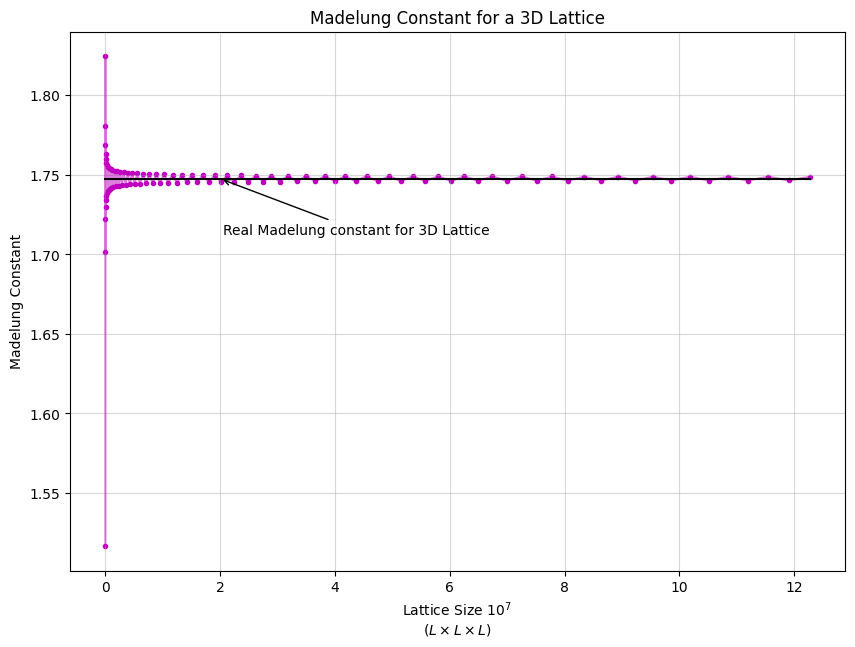

,Lattice Size,Madelung Constant
0,8.0,1.516646
1,343.0,1.824544
2,1728.0,1.701377
3,4913.0,1.780556
4,10648.0,1.721905
...,...,...
95,108531333.0,1.748774
96,111980168.0,1.746368
97,115501303.0,1.748749
98,119095488.0,1.746392


In [4]:
fig, ax=plt.subplots(figsize=(10,7))
plt.scatter(x3d,y3d, marker=".",c='m')
plt.grid(alpha=0.5)
plt.plot(x3d,y3d, c='m', alpha=0.5)
RealM3d=np.full(len(x3d),1.7475)
plt.plot(x3d,RealM3d, c='black', label="Real Madelung Constant")
plt.title("Madelung Constant for a 3D Lattice")
plt.xlabel(r'Lattice Size $10^7$'+' \n'+r'$ (L \times L \times L)$')
plt.ylabel("Madelung Constant")
plt.annotate('Real Madelung constant for 3D Lattice', xy=(2, 1.7475), xytext=(2.2, -40),
              textcoords='offset points', arrowprops=dict(arrowstyle='->', color='black'))
data={'Lattice Size':x3d*10**7,'Madelung Constant':y3d}
p=pd.DataFrame(data)
plt.show()
display(p)

##Diagram of the Madelung constant vs inverse of the lattice size in 3D

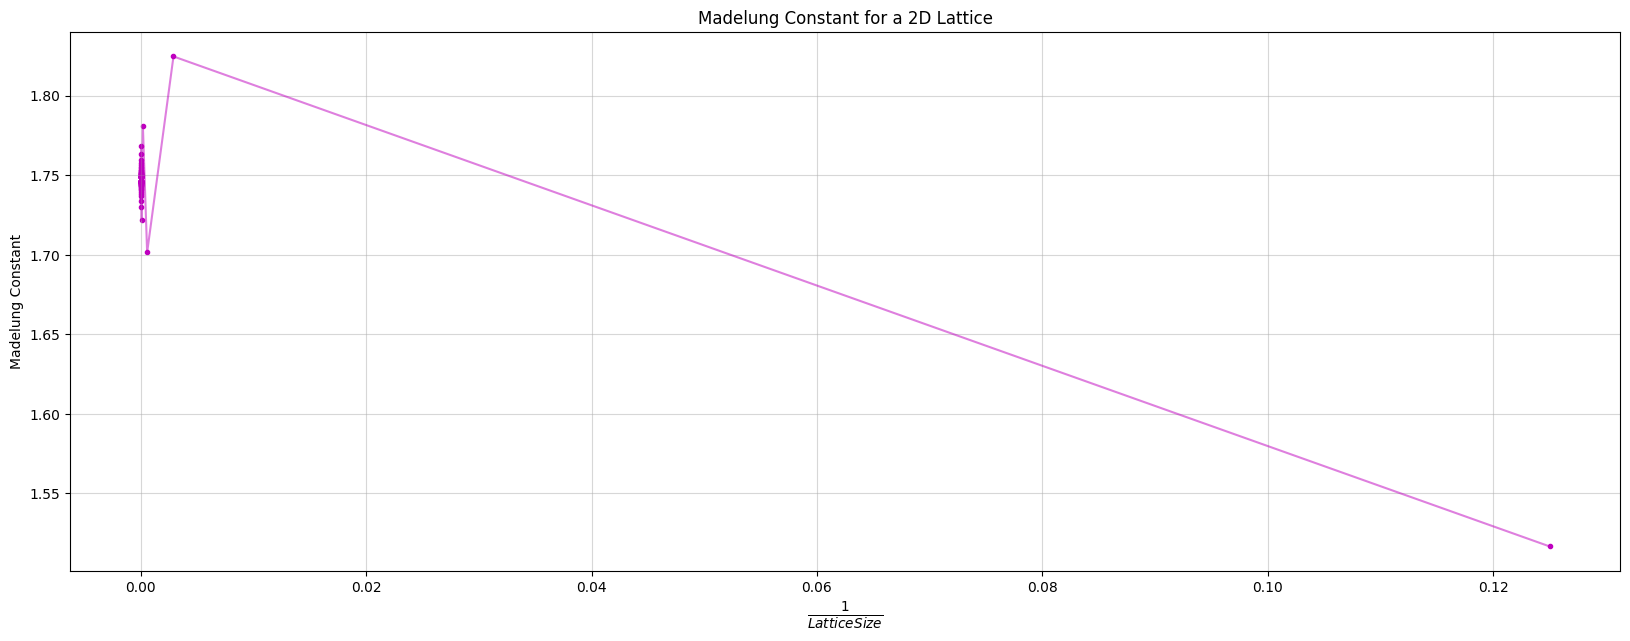

,Lattice Size,1/(Lattice Size),Madelung Constant
0,8.0,1.250000e-01,1.516646
1,343.0,2.915452e-03,1.824544
2,1728.0,5.787037e-04,1.701377
3,4913.0,2.035416e-04,1.780556
4,10648.0,9.391435e-05,1.721905
...,...,...,...
95,108531333.0,9.213929e-09,1.748774
96,111980168.0,8.930153e-09,1.746368
97,115501303.0,8.657911e-09,1.748749
98,119095488.0,8.396624e-09,1.746392


In [5]:
fig, ax=plt.subplots(figsize=(20,7))
plt.scatter(x3dRev*10**(-7),y3d,marker='.',c='m')
plt.plot(x3dRev*10**(-7),y3d,c='m', alpha=0.5)
data={'Lattice Size': x3d*10**7,'1/(Lattice Size)':x3dRev*10**(-7),'Madelung Constant':y3d}
plt.title("Madelung Constant for a 2D Lattice")
plt.xlabel(r'$\frac{1}{Lattice Size}$', fontsize=14)
plt.ylabel("Madelung Constant")
p=pd.DataFrame(data)
plt.grid(alpha=0.5)
plt.show()
display(p)

##Diagram of the Madelung constant for an infinite 2D lattice with +q and -q ions.
we can see that the madelung constant for this structure converges to 1.614

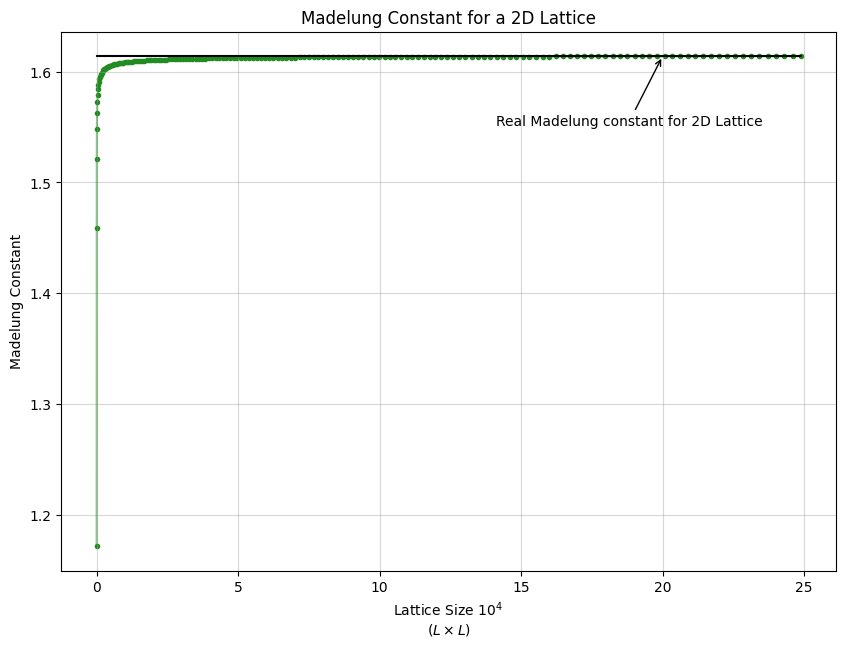

,Lattice Size,Madelung Constant
0,1.0,1.171573
1,16.0,1.458895
2,49.0,1.521367
3,100.0,1.548237
4,168.0,1.563182
...,...,...
162,237169.0,1.614092
163,240100.0,1.614101
164,243049.0,1.614110
165,246016.0,1.614118


In [ ]:
LatticeSize=np.arange(1,500,3)

def CalMad2D(L):
  L=L+1
  I = np.indices([L,L])[0,:,:] # x-axis
  J = np.indices([L,L])[1,:,:] # y-axis
  I[0,0]=100
  M = (-1 + 2 * ((I+J)%2))/np.sqrt(I**2+J**2)

  axes = M[0,1:].sum() + M[1:,0].sum()
  faces = M[1:,1:].sum()
  madelung = (2 * axes) + (4 * faces)
  return madelung


fig, ax=plt.subplots(figsize=(10,7))
x2d=[]; y2d=[];
for i in LatticeSize:
  m=CalMad2D(i)
  x2d.append(i**2/10000)
  y2d.append(m)
  plt.scatter(i**2/10000,m, marker=".",c='forestgreen')

x2d=np.array(x2d); y2d=np.array(y2d); 
x2dRev=1/x2d
plt.grid(alpha=0.5)
plt.plot(x2d,y2d, c='forestgreen', alpha=0.5)
RealM2d=np.full(len(x2d),1.614)
plt.plot(x2d,RealM2d, c='black')
plt.title("Madelung Constant for a 2D Lattice")
plt.xlabel(r'Lattice Size $10^4$'+' \n'+r'$ (L \times L)$')
plt.ylabel("Madelung Constant")
plt.annotate('Real Madelung constant for 2D Lattice', xy=(20, 1.614), xytext=(-120, -50),
              textcoords='offset points', arrowprops=dict(arrowstyle='->', color='black'))
for i in range(len(x2d)):
  x2d[i]*=10000
  x2d[i]=int(x2d[i])
data={'Lattice Size':x2d,'Madelung Constant':y2d}
p=pd.DataFrame(data)
plt.show()
display(p)

##Diagram of the Madelung constant vs inverse of the lattice size in 2D

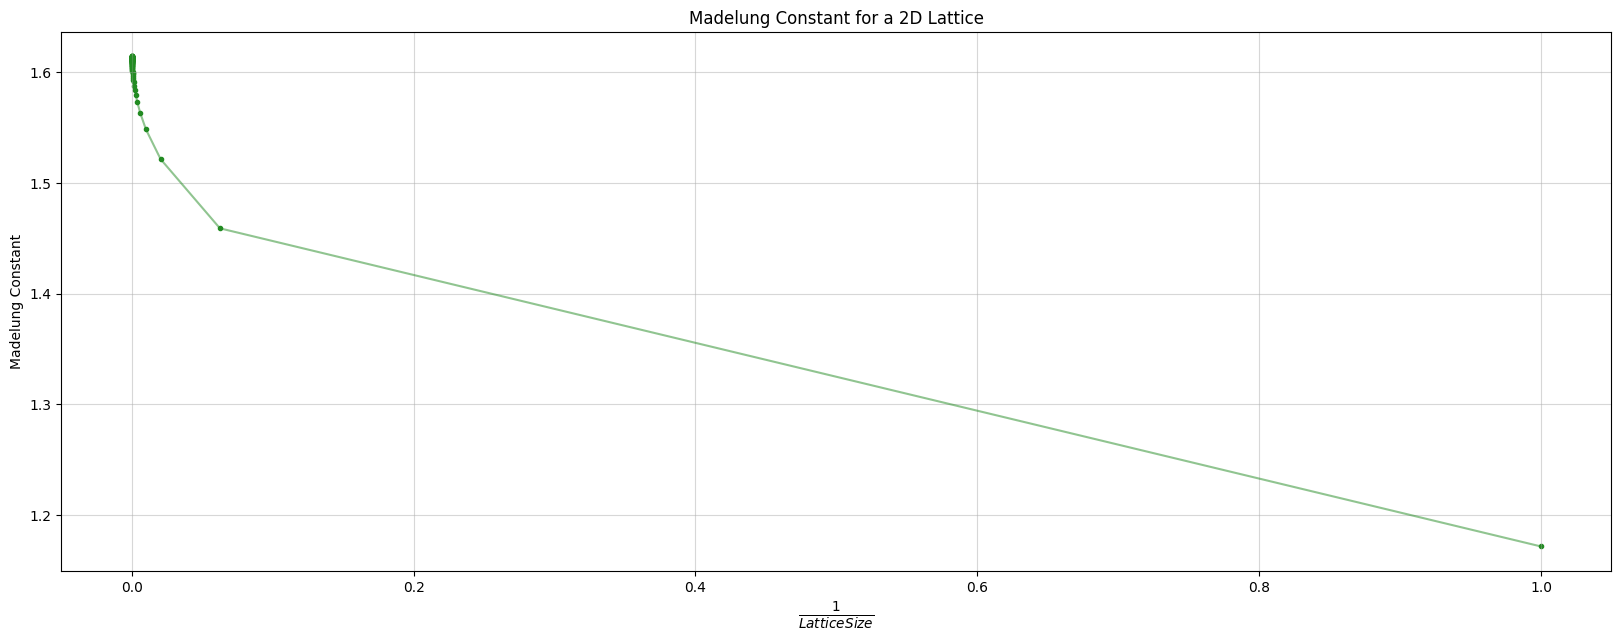

,Lattice Size,1/Lattice Size,Madelung Constant
0,1.0,1.000000,1.171573
1,16.0,0.062500,1.458895
2,49.0,0.020408,1.521367
3,100.0,0.010000,1.548237
4,168.0,0.005917,1.563182
...,...,...,...
162,237169.0,0.000004,1.614092
163,240100.0,0.000004,1.614101
164,243049.0,0.000004,1.614110
165,246016.0,0.000004,1.614118


In [ ]:
fig, ax=plt.subplots(figsize=(20,7))
plt.scatter(x2dRev*10**(-4),y2d,marker='.',c='forestgreen')
plt.plot(x2dRev*10**(-4),y2d,c='forestgreen', alpha=0.5)

data={'Lattice Size': x2d,'1/Lattice Size':x2dRev*10**(-4),'Madelung Constant':y2d}
plt.title("Madelung Constant for a 2D Lattice")
plt.xlabel(r'$\frac{1}{Lattice Size}$', fontsize=14)
plt.ylabel("Madelung Constant")
p=pd.DataFrame(data)
plt.grid(alpha=0.5)
plt.show()
display(p)